<a href="https://colab.research.google.com/github/rs-ravi2/DS/blob/main/Statistical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import os, glob, shutil
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
housing_data = pd.read_csv('/content/drive/MyDrive/Colab Data/HousingData.csv')

In [6]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
data = housing_data.dropna()

In [8]:
X = data.iloc[:, 4:8].values
y = data.iloc[:, -1].values

In [9]:
X = np.matrix(X)
Y = np.matrix(y)

In [10]:
def func(X, Y):
  XT = np.transpose(X)
  XTX = XT.dot(X)
  inv_XTX = np.linalg.inv(XTX)
  f = np.dot(np.dot(X, inv_XTX), XT)

  Yf = np.dot(Y, f)
  Beta = np.dot(inv_XTX, XT)
  Beta = Beta.dot(np.transpose(Y))

  return Yf, Beta

In [11]:
Yf, Beta = func(X,Y)

In [12]:
true_value = (np.asarray(Y)).flatten()
predicted_value = (np.asarray(Yf)).flatten()

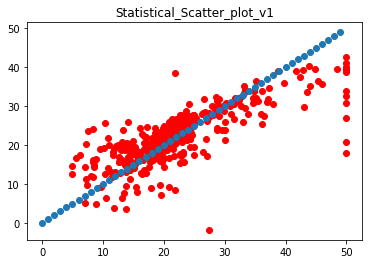

In [13]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()

plotGraph(true_value, predicted_value, 'Statistical_Scatter_plot_v1')

In [14]:
# # Importing data and separating X & y variables
# dt = genfromtxt("/content/drive/MyDrive/Colab Data/HousingData.csv", delimiter=",")
# X = dt[:, 0:3]
# y= dt[:, 3]
# print(y[0:10])

In [15]:
Beta

matrix([[-27.66719781],
        [  7.71543652],
        [ -0.08212089],
        [ -1.33886288]])

In [16]:
# # Multivariate Linear Regression using Gradient Descent
# def LinReg_with_gradient_descent(X, y, alpha, epoch):
#   m = X.shape[0]  # number of samples
#   print("m:", m)
#   ones = np.ones((m,1))  
#   X = np.concatenate((ones, X), axis=1)   # New X with X0's =1
#   n = X.shape[1]   # 
#   Beta = np.ones(n)    # n= 4  parameter initialization
#   h = np.dot(X, Beta)   # Compute hypothesis

#   # Gradient descent algorithm
#   cost = np.ones(epoch)
#   for i in range (0, epoch):
#     Beta[0] = Beta[0] - alpha * ((-2) / X.shape[0]) * sum(y-h)
#     for j in range(1, n):
#       Beta[j]= Beta[j] - alpha * ((-2) / X.shape[0]) * sum((y-h) * X[:, j])
#     h  = np.dot(X, Beta)
#     cost[i] = 1/(2*m) * sum(np.square(y-h))  # Compute Cost
#   return cost, Beta

In [17]:
# cost, Beta = LinReg_with_gradient_descent(X, y, 0.001, 1000)